In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split

In [34]:
test_df = pd.read_csv("dataset/fashion-mnist_test.csv")
train_df = pd.read_csv("dataset/fashion-mnist_train.csv")

In [35]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
train_df = np.array(train_df, dtype = "float32")
test_df = np.array(train_df, dtype = "float32")

In [38]:
X_train = train_df[:,1:]/255
Y_train = train_df[:,0]
X_test = test_df[:,1:]/255
Y_test = test_df[:,0]

In [39]:
input_shape = [None, 28, 28, 1]
no_of_classes = 10

X_train.reshape(X_train.shape[0], input_shape[1], input_shape[2], input_shape[3])
X_test.reshape(X_test.shape[0], input_shape[1], input_shape[2], input_shape[3])

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)

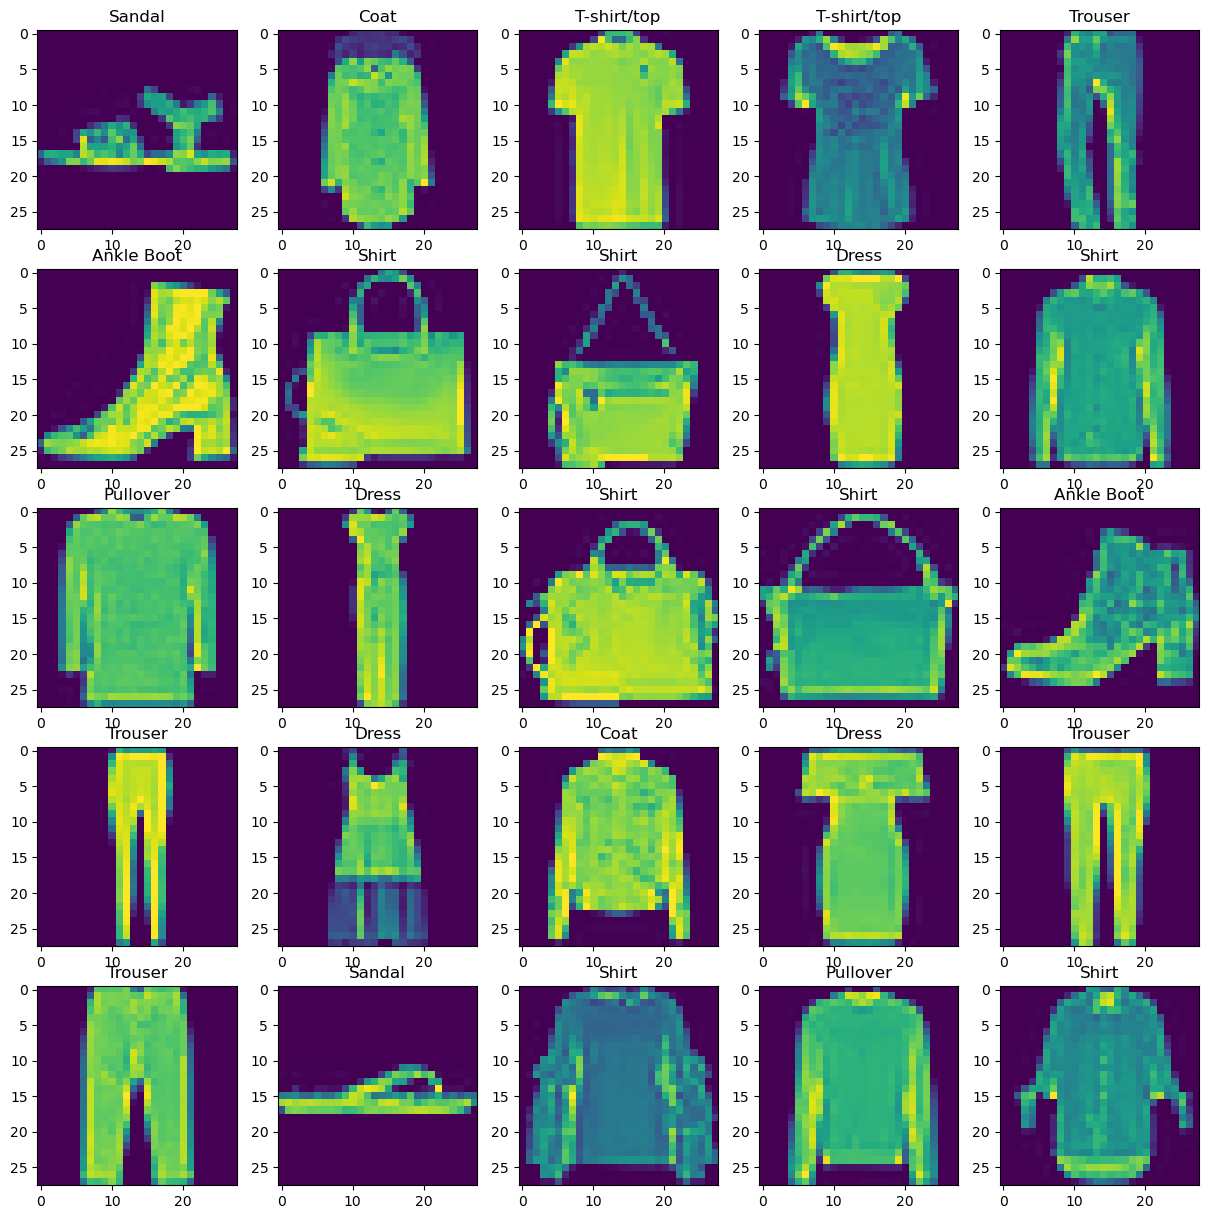

In [41]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Shirt", "Ankle Boot"]
plt.figure(figsize = (15,15))
for i in range (25):
    plt.subplot(5,5,i+1)
    image = X_train[i].reshape(28,28)
    plt.title(labels[int(Y_train[i])])
    plt.imshow(image)
plt.show()

In [42]:
def cnn_model(input_shape, no_of_classes, learning_rate):
    
    input_layer = tf.placeholder(tf.float32, shape = input_shape)
    
    labels = tf.placeholder(tf.float32, shape = [None, no_of_classes])
    
    train_mode = tf.placeholder(tf.bool)
    
    #conv1 -> maxpool1 -> conv2 -> maxpool2 -> flatten -> dense -> dropout -> logits -> softmax
    
    conv1 = Conv2D(input = input_layer,
                  filters = 32,
                  kernel_size = [5,5],
                  padding = "same",
                  activation = "relu")
    
    pool1 = max_polling2D(input = conv1,
                         pool_size = [2,2]
                         stride = 2)
    
    conv2 = Conv2D(input = pool1,
                  filters = 64,
                  kernel_size = [5,5],
                  padding = "same",
                  activation = "relu")
    
    pool2 = max_polling2D(input = conv2,
                         pool_size = [2,2],
                         stride = 2)
    
    flatten = Flatten()
    
    dense = Dense(input = flatten,
                 units = 1024,
                 activation = "relu")
    
    dropout = Dropout(input = dense,
                     rate = 0.3,
                     training_mode = train_mode)
    
    logits = Dense(input = dropout,
                  units = 10)
    
    predictions = {
        "classes" : tf.argmax(logits, axis = 1),
        "softmax" : tf.nn.softmax(logits = logits)
    }
    
    loss = tf.nn.softmax_cross_entropy(labels, logits)
    
    train_op = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss)
    
    return {
        "predictions" : predictions,
        "loss" : loss,
        "train_op" : train_op,
        "logits" : logits,
        "train_mode" : train_mode,
        "x" : input_layer,
        "y" : labels
    }

SyntaxError: invalid syntax (2402306286.py, line 19)